In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd

In [7]:
brands = []
capacity = []
star_rating = []
condenser_coil = []
power_consumption = []
noise_level = []
ambient_temperature = []
wifi = []
warranty = []
prices = []
for page in range(1,35):
    data = requests.get("https://www.flipkart.com/search?q=ac&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(page))
    url = BeautifulSoup(data.text)
    
    for info in url.find_all("div", class_="col col-7-12"):
        a = info.text
        b = a.split()
        
        COIL = re.findall(r"Condenser\sCoil\W\s(\w+)",a)
        
        POWER_INT = re.findall(r"\w+\sConsumption\W\s(\d+)\s\w+",a)
        POWER_FLOAT = re.findall(r"\w+\sConsumption\W\s(\d+\W\d+)\s\w+",a)
        POWER1 = " ".join(POWER_INT)
        POWER2 = " ".join(POWER_FLOAT)
        
        NOISE = re.findall(r"Noise\slevel\W\s(\d+)",a)
        
        TEMPERATURE1 = re.findall(r"\sTemperature\W\s(\d+)\s\w+",a)
        TEMPERATURE2 = " ".join(TEMPERATURE1)
        
        CAPACITY1 = re.findall(r"\s(\d+\W\d+)\sTon",a)
        CAPACITY2 = re.findall(r"\s(\d+)\sTon",a)
        
        RATING1 = re.findall(r"Ton\s(\d+)\sStar",a)
        RATING2 = " ".join(RATING1)

        
        WIFI= re.findall(r"Wi\WFi\sEnabled\W\s(\w+)",a)   # ------> Wi-Fi', 'Enabled:', 'No
        WARRANTY = re.findall(r"(\d+)\sYears\son\sCompressor",a)      #------> '5', 'Years', 'on', 'Compressor'

    #------> Brand
        brands.append(b[0])
    #-------> CAPACITY
        if len(CAPACITY1)>0:
            capacity.append(CAPACITY1[0])
        elif len(CAPACITY2)>0:
            capacity.append(CAPACITY2[0])
        else:
            capacity.append()
    #------> Star Rating        
        if len(star_rating)!=len(brands):
            star_rating.extend([np.nan]*(len(brands)-len(star_rating)-1))
        for rating in RATING1:
            if len(RATING1)>0:
                star_rating.append(RATING2)              
            else:
                star_rating.append(np.nan)
        
    #-------> Coil
        if len(COIL)>0:
            condenser_coil.append(COIL[0])
        else:
            condenser_coil.append(np.nan)
            
    #------> Power Consumption
        if len(power_consumption)!=len(brands):
            power_consumption.extend([np.nan]*(len(brands)-len(power_consumption)-1))
        for pc in POWER_INT: 
            if len(pc)>0:
                power_consumption.append(POWER1)
            else:
                power_consumption.append(np.nan)
        for pc in POWER_FLOAT:
            if len(pc)>0:
                power_consumption.append(POWER2)
            else:
                power_consumption.append(np.nan)
            
    #------> Noise Level
        if len(NOISE)>0:
            noise_level.append(NOISE[0])
        else:
            noise_level.append(np.nan)
            
    #------> Ambient Temperature
        if len(TEMPERATURE1)>0:
            ambient_temperature.append(TEMPERATURE2)
        else:
            ambient_temperature.append(np.nan)
        
            
    #------> Wifi Feature
        if len(WIFI)>0:
            wifi.append(WIFI[0])
        else:
            wifi.append(np.nan)
            
    #------> Warranty
        if len(WARRANTY)>0:
            warranty.append(WARRANTY[0])
        else:
            warranty.append(np.nan)

    #------> Prices
    for cost_price in url.find_all("div",class_="_30jeq3 _1_WHN1"):
        a = cost_price.text  
        b = re.findall(r"₹(\d+,\d+)",a)
        c = " ".join(b)
        #if len(prices)!=len(brands):
         #   .extend([np.nan]*(len(brands)-len(prices)-1))
        if len(b)>0:
            prices.append(c)
        else:
            prices.append(np.nan)

In [8]:
lens = [brands,capacity,star_rating,condenser_coil,power_consumption,noise_level,ambient_temperature,wifi,warranty,prices]
for i in lens:
    print(len(i))

816
816
816
816
816
816
816
816
816
816


In [10]:
project_data = pd.DataFrame({
    "Brand":brands,
    "Capacity":capacity,
    "Rating":star_rating,
    "Condenser Coil":condenser_coil,
    "Power Consumption":power_consumption,
    "Noise Level":noise_level,

    "Ambient Temperature":ambient_temperature,
    "Wi-Fi":wifi,
    "Warranty":warranty,
    "Price":prices
})

project_data

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Ambient Temperature,Wi-Fi,Warranty,Price
0,ONIDA,1,5,CopperPower,820,38,NaN,No1,NaN,"31,490"
1,Panasonic,1,3,CopperPower,1095,45,NaN,Yes1,9,"32,999"
2,LG,1.5,4,CopperPower,847.58,26,NaN,No1,10,"38,990"
3,Midea,1.5,3,CopperPower,1445,38,52,No1,10,"31,499"
4,IFB,1.5,3,CopperPower,1088,39,NaN,No1,10,"32,999"
...,...,...,...,...,...,...,...,...,...,...
811,LG,1.5,4,NaN,NaN,NaN,NaN,No,NaN,"38,990"
812,Lloyd,1.5,5,CopperPower,946.91,40,NaN,Yes1,10,"41,190"
813,LG,1.5,3,CopperPower,1440,34,NaN,No1,10,"36,990"
814,Croma,1.5,3,CopperPower,1590,54,NaN,No1,5,"28,390"


# Data Cleaning

In [29]:
project_data.shape

(816, 11)

In [31]:
project_data.drop(["index"],axis=1,inplace=True)

In [32]:
project_data

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Ambient Temperature,Wi-Fi,Warranty,Price
0,ONIDA,1,5,Copper,820,38,NaN,No,NaN,31490
1,Panasonic,1,3,Copper,1095,45,NaN,Yes,9,32999
2,LG,1.5,4,Copper,847.58,26,NaN,No,10,38990
3,Midea,1.5,3,Copper,1445,38,52,No,10,31499
4,IFB,1.5,3,Copper,1088,39,NaN,No,10,32999
...,...,...,...,...,...,...,...,...,...,...
811,LG,1.5,4,NaN,NaN,NaN,NaN,No,NaN,38990
812,Lloyd,1.5,5,Copper,946.91,40,NaN,Yes,10,41190
813,LG,1.5,3,Copper,1440,34,NaN,No,10,36990
814,Croma,1.5,3,Copper,1590,54,NaN,No,5,28390


In [11]:
project_data.drop(["Ambient Temperature"],axis = 1, inplace = True)


In [12]:
project_data.head()

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Wi-Fi,Warranty,Price
0,ONIDA,1.0,5,Copper,820.00,38.0,No,NaN,31490
1,Panasonic,1.0,3,Copper,1095.00,45.0,Yes,9.0,32999
2,LG,1.5,4,Copper,847.58,26.0,No,10.0,38990
3,Midea,1.5,3,Copper,1445.00,38.0,No,10.0,31499
4,IFB,1.5,3,Copper,1088.00,39.0,No,10.0,32999


In [13]:
project_data.tail()

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Wi-Fi,Warranty,Price
811,LG,1.5,4,Aluminium,NaN,NaN,No,NaN,38990
812,Lloyd,1.5,5,Copper,946.91,40.0,Yes,10.0,41190
813,LG,1.5,3,Copper,1440.00,34.0,No,10.0,36990
814,Croma,1.5,3,Copper,1590.00,54.0,No,5.0,28390
815,Hitachi,1.0,3,Copper,1200.00,37.0,No,10.0,32799


In [14]:
project_data

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Wi-Fi,Warranty,Price
0,ONIDA,1.0,5,Copper,820.00,38.0,No,NaN,31490
1,Panasonic,1.0,3,Copper,1095.00,45.0,Yes,9.0,32999
2,LG,1.5,4,Copper,847.58,26.0,No,10.0,38990
3,Midea,1.5,3,Copper,1445.00,38.0,No,10.0,31499
4,IFB,1.5,3,Copper,1088.00,39.0,No,10.0,32999
...,...,...,...,...,...,...,...,...,...
811,LG,1.5,4,Aluminium,NaN,NaN,No,NaN,38990
812,Lloyd,1.5,5,Copper,946.91,40.0,Yes,10.0,41190
813,LG,1.5,3,Copper,1440.00,34.0,No,10.0,36990
814,Croma,1.5,3,Copper,1590.00,54.0,No,5.0,28390


## Missing Value Treatment

In [40]:
project_data["Rating"] = project_data["Rating"].fillna(project_data["Rating"].mode()[0])
project_data["Condenser Coil"] = project_data["Condenser Coil"].fillna('Aluminium')
project_data["Wi-Fi"] = project_data["Wi-Fi"].fillna("No")
project_data["Capacity"] = project_data["Capacity"].fillna("1")
project_data["Power Consumption"] = project_data["Power Consumption"].fillna(project_data["Power Consumption"].mean())
project_data["Noise Level"] = project_data["Noise Level"].fillna(project_data["Noise Level"].mean()).astype("int")
project_data["Warranty"] = project_data["Warranty"].fillna(project_data["Warranty"].mean()).astype("int")

In [41]:
project_data.isnull().sum()

Brand                0
Capacity             0
Rating               0
Condenser Coil       0
Power Consumption    0
Noise Level          0
Wi-Fi                0
Warranty             0
Price                0
dtype: int64

## Type Conversion

In [43]:
project_data["Rating"] = project_data["Rating"].astype("int")
project_data["Capacity"] = project_data["Capacity"].astype("float")
project_data["Power Consumption"] = project_data["Power Consumption"].astype("float")
project_data["Noise Level"] = project_data["Noise Level"].astype("int")
project_data["Warranty"] = project_data["Warranty"].astype("int")
project_data["Price"] = project_data["Price"].astype("int")

In [44]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              816 non-null    object 
 1   Capacity           816 non-null    float64
 2   Rating             816 non-null    int32  
 3   Condenser Coil     816 non-null    object 
 4   Power Consumption  816 non-null    float64
 5   Noise Level        816 non-null    int32  
 6   Wi-Fi              816 non-null    object 
 7   Warranty           816 non-null    int32  
 8   Price              816 non-null    int32  
dtypes: float64(2), int32(4), object(3)
memory usage: 44.8+ KB


In [45]:
project_data.to_csv("Final_Project")

In [46]:
project_data = pd.read_csv("Final_Project")

In [47]:
project_data

,Unnamed: 0,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Wi-Fi,Warranty,Price
0,0,ONIDA,1.0,5,Copper,820.000000,38,No,8,31490
1,1,Panasonic,1.0,3,Copper,1095.000000,45,Yes,9,32999
2,2,LG,1.5,4,Copper,847.580000,26,No,10,38990
3,3,Midea,1.5,3,Copper,1445.000000,38,No,10,31499
4,4,IFB,1.5,3,Copper,1088.000000,39,No,10,32999
...,...,...,...,...,...,...,...,...,...,...
811,811,LG,1.5,4,Aluminium,1382.708073,41,No,8,38990
812,812,Lloyd,1.5,5,Copper,946.910000,40,Yes,10,41190
813,813,LG,1.5,3,Copper,1440.000000,34,No,10,36990
814,814,Croma,1.5,3,Copper,1590.000000,54,No,5,28390


In [48]:
project_data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [49]:
project_data

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Wi-Fi,Warranty,Price
0,ONIDA,1.0,5,Copper,820.000000,38,No,8,31490
1,Panasonic,1.0,3,Copper,1095.000000,45,Yes,9,32999
2,LG,1.5,4,Copper,847.580000,26,No,10,38990
3,Midea,1.5,3,Copper,1445.000000,38,No,10,31499
4,IFB,1.5,3,Copper,1088.000000,39,No,10,32999
...,...,...,...,...,...,...,...,...,...
811,LG,1.5,4,Aluminium,1382.708073,41,No,8,38990
812,Lloyd,1.5,5,Copper,946.910000,40,Yes,10,41190
813,LG,1.5,3,Copper,1440.000000,34,No,10,36990
814,Croma,1.5,3,Copper,1590.000000,54,No,5,28390


In [50]:
project_data.describe()

,Capacity,Rating,Power Consumption,Noise Level,Warranty,Price
count,816.000000,816.000000,816.000000,816.000000,816.00000,816.000000
mean,1.408542,3.716912,1382.708073,41.105392,8.16299,38436.765931
std,0.304198,0.917189,672.779785,8.905291,2.11025,8244.355639
min,0.800000,1.000000,114.710000,20.000000,4.00000,123.000000
25%,1.000000,3.000000,1013.010000,36.000000,5.00000,32990.000000
50%,1.500000,3.000000,1365.000000,41.000000,8.00000,36990.000000
75%,1.500000,5.000000,1602.000000,46.000000,10.00000,42990.000000
max,2.200000,5.000000,6500.000000,94.000000,12.00000,76990.000000


# Data Analysis

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

In [52]:
project_data["Brand"].value_counts()

LG           78
Daikin       77
Lloyd        73
Voltas       68
SAMSUNG      67
Blue         64
Hitachi      58
Panasonic    57
CARRIER      47
Croma        32
Whirlpool    30
Haier        25
Godrej       25
ONIDA        16
MarQ         16
IFB          11
TOSHIBA      10
O             9
MOTOROLA      7
Midea         7
Nokia         5
Hisense       4
Gazhal        4
Thomson       4
LIVPURE       3
realme        3
LumX          3
IMPEX         2
Sansui        2
imee          2
vizio         1
iFFALCON      1
Intex         1
TCL           1
VG            1
CANDY         1
Hyundai       1
Name: Brand, dtype: int64

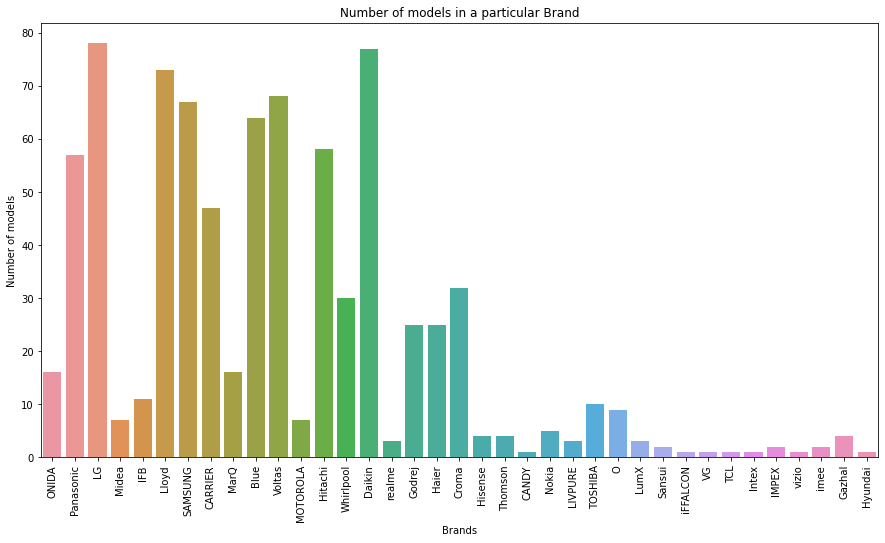

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(x= 'Brand', data = project_data)
plt.title('Number of models in a particular Brand')
plt.ylabel('Number of models')
plt.xlabel('Brands')
plt.xticks(rotation = 90)
plt.show()

 ## Observation of Brands

From the above Bar graph, we can observe that the brand "LG" [78] have the highest number of models and "Daikin" and "Lloyd" stood as second and third highest with [77] and [73] models respectively. whereas, "vizio","iFFALCON","Intex","TCL","VG","CANDY" and "Hyundai" have only 1 model. which are the least.

In [53]:
project_data["Capacity"].value_counts()

1.50    464
1.00    218
2.00     74
1.80     23
1.20     12
0.80      9
1.60      7
1.40      3
0.90      2
1.25      1
2.20      1
1.70      1
2.02      1
Name: Capacity, dtype: int64

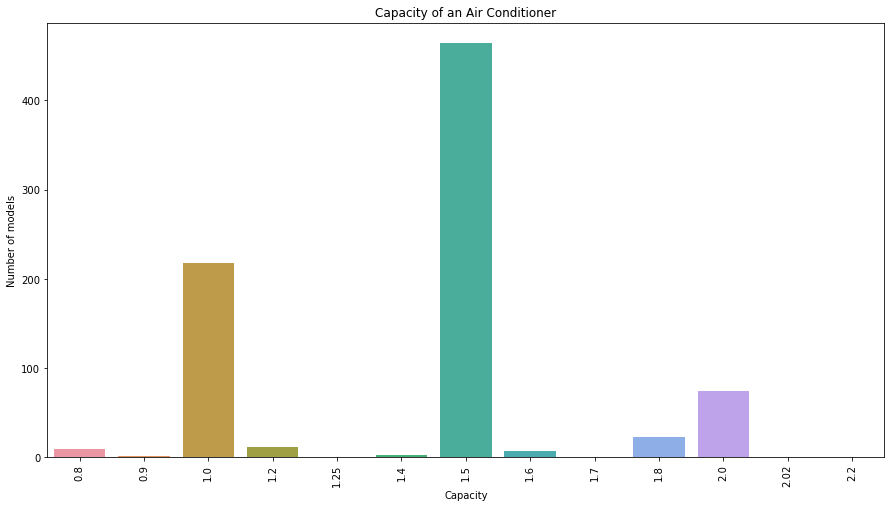

In [54]:
plt.figure(figsize=(15,8))
sns.countplot(x= 'Capacity', data = project_data)
plt.title('Capacity of an Air Conditioner')
plt.ylabel('Number of models')
plt.xlabel('Capacity')
plt.xticks(rotation = 90)
plt.show()

## Observation of Capacity

From this Bar chart, We can observe that, Air Conditioners with "1.5" Ton Capacity are highest in number [464]. whereas, "1.25"
"2.20","1.70","2.02" Ton Air conditioners are least in number[1] .


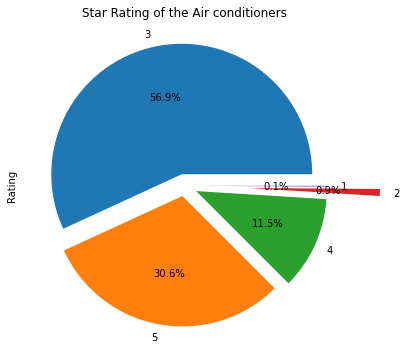

In [55]:
plt.figure(figsize=(12,6))
project_data["Rating"].value_counts().plot.pie(autopct="%.1f%%",explode=[0.09,0.08,0.1,0.5,0.1])
plt.title("Star Rating of the Air conditioners")
plt.show()

## Observation of Star Rating

From this Pie chart, We can observe that 56.9% of the Air conditioners have the rating "3" out of 5, which is moderate. And "4" & "5" rated Air conditioners together are 42.1% , which are good enough. only 1% of Air conditioners are rated the least.

In [58]:
project_data.describe()

,Capacity,Rating,Power Consumption,Noise Level,Warranty,Price
count,816.000000,816.000000,816.000000,816.000000,816.00000,816.000000
mean,1.408542,3.716912,1382.708073,41.105392,8.16299,38436.765931
std,0.304198,0.917189,672.779785,8.905291,2.11025,8244.355639
min,0.800000,1.000000,114.710000,20.000000,4.00000,123.000000
25%,1.000000,3.000000,1013.010000,36.000000,5.00000,32990.000000
50%,1.500000,3.000000,1365.000000,41.000000,8.00000,36990.000000
75%,1.500000,5.000000,1602.000000,46.000000,10.00000,42990.000000
max,2.200000,5.000000,6500.000000,94.000000,12.00000,76990.000000


<AxesSubplot:>

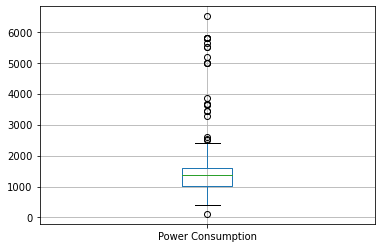

In [56]:
project_data.boxplot(column = "Power Consumption")

## Observation of Power Consumption

Most of the air conditioners consumes power in the range of 1000 Watts to 1600 Watts. And here, We can also observe that the minimum value is around 115 Watts, which is considered as outlier. Median is 1365 Watts and , maximum value is 6500 Watts, which is an outlier. Values beyond 2500 Watts are outliers.

C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Noise Level'>

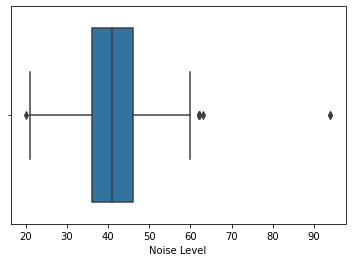

In [59]:
sns.boxplot(project_data["Noise Level"])

## Observation of Noise Level
The inter-quartile range of Noise level is between 21 dB to 60 dB. We can observe that the minimum level is 20 dB and maximum level is 94 dB. Here, median is 41 dB.


In [60]:
project_data["Wi-Fi"].value_counts()

No     720
Yes     96
Name: Wi-Fi, dtype: int64

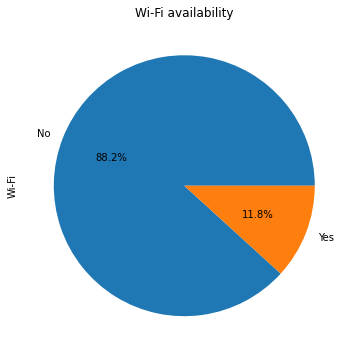

In [61]:
plt.figure(figsize=(12,6))
project_data["Wi-Fi"].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Wi-Fi availability")
plt.show()

##  Observation of Wi-Fi availability

Only 11.8% of Air conditioners have Wi-Fi feature, which is only available for flagship Air conditioners.

C:\Users\racha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


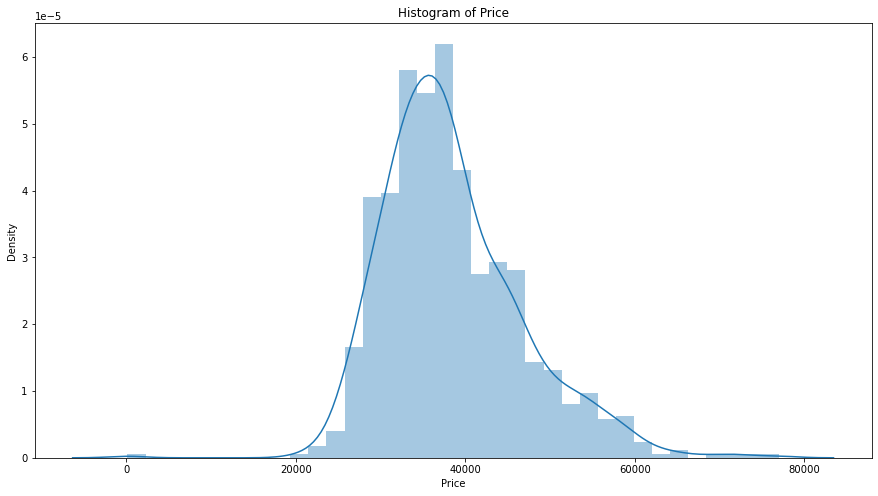

In [94]:
plt.figure(figsize=(15,8))
sns.distplot(project_data["Price"],kde=True)
plt.title('Histogram of Price')
plt.show()

## Observation of Price

Many of the Air conditioners are available in the prince range between RS.30,000 to RS.40,000. Price Starts from 22,000 and goes up to 77,000. 

# Bivariate Analysis

In [73]:
project_data["Power Consumption"].corr(project_data["Price"])

0.22330554763889723

In [74]:
project_data["Power Consumption"].corr(project_data["Noise Level"])

0.03365370472807558

In [75]:
project_data["Capacity"].corr(project_data["Price"])

0.5467518025830724

In [82]:
project_data["Capacity"].corr(project_data["Power Consumption"])

0.344595860685378

In [83]:
project_data["Capacity"].corr(project_data["Noise Level"])

0.17276604683231486

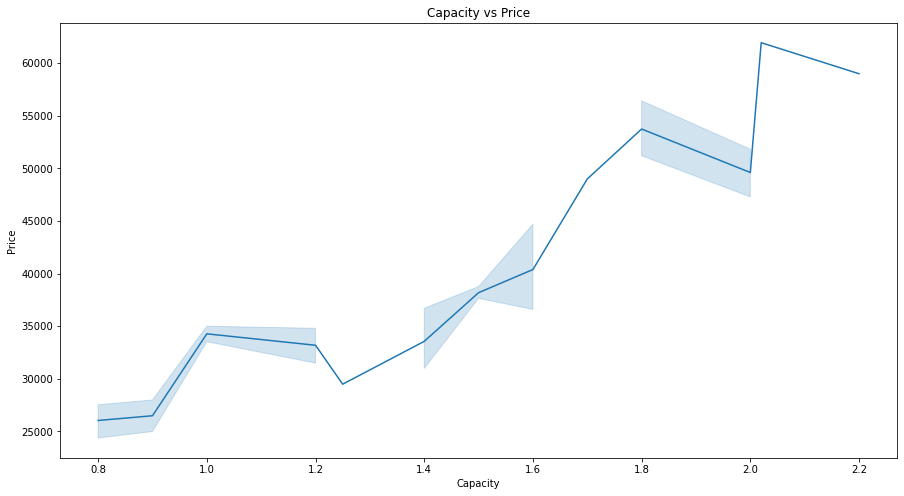

In [95]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "Capacity", y = "Price", data = project_data)
plt.title('Capacity vs Price')
plt.xlabel("Capacity")
plt.ylabel("Price")
plt.show()

## Observation

The graph is increasing from left to right. It indicates that if the Capacity of Air Conditioners increase, then Price will also increases. ,i.e, Capacity is directly proportional to Price.

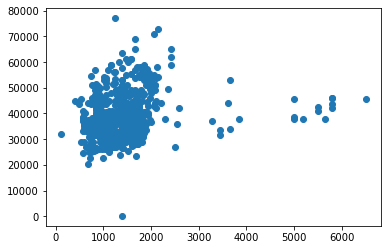

In [89]:
plt.scatter(project_data["Power Consumption"],project_data["Price"])

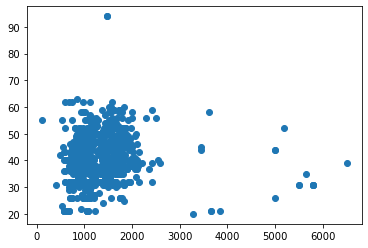

In [90]:
plt.scatter(project_data["Power Consumption"],project_data["Noise Level"])

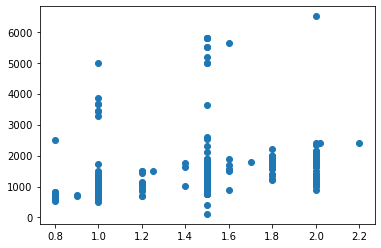

In [96]:
plt.scatter(project_data["Capacity"],project_data["Power Consumption"])

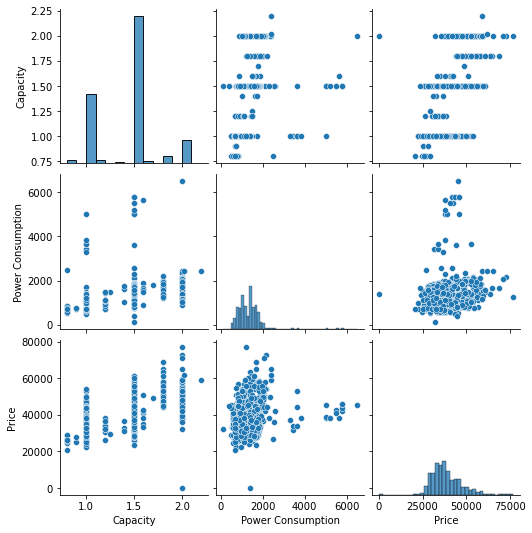

In [91]:
sns.pairplot(data = project_data, vars=['Capacity','Power Consumption','Price'])
plt.show()

In [97]:
num_project = project_data.select_dtypes(include = 'number')

In [98]:
num_project.head()

,Capacity,Rating,Power Consumption,Noise Level,Warranty,Price
0,1.0,5,820.00,38,8,31490
1,1.0,3,1095.00,45,9,32999
2,1.5,4,847.58,26,10,38990
3,1.5,3,1445.00,38,10,31499
4,1.5,3,1088.00,39,10,32999


In [99]:
num_project.corr()

,Capacity,Rating,Power Consumption,Noise Level,Warranty,Price
Capacity,1.000000,0.029127,0.344596,0.172766,-0.015284,0.546752
Rating,0.029127,1.000000,-0.067100,-0.023533,0.120862,0.343483
Power Consumption,0.344596,-0.067100,1.000000,0.033654,-0.012945,0.223306
Noise Level,0.172766,-0.023533,0.033654,1.000000,-0.308571,-0.142228
Warranty,-0.015284,0.120862,-0.012945,-0.308571,1.000000,0.217197
Price,0.546752,0.343483,0.223306,-0.142228,0.217197,1.000000


In [100]:
project_heatmap = project_data[['Capacity','Rating','Power Consumption','Noise Level','Price']].corr()

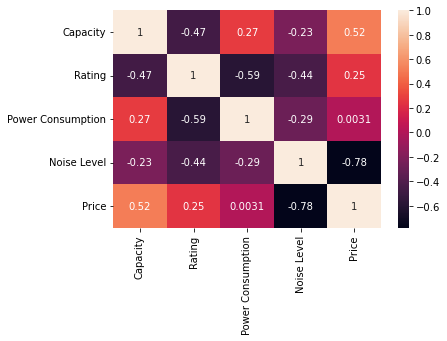

In [101]:
sns.heatmap(project_heatmap.corr(), annot=True)
plt.show()

## Observation

There is a negative correlation for Noise Level and Price [-0.78] and there is a positive correlation for Power Consumption and Capacity [0.27].

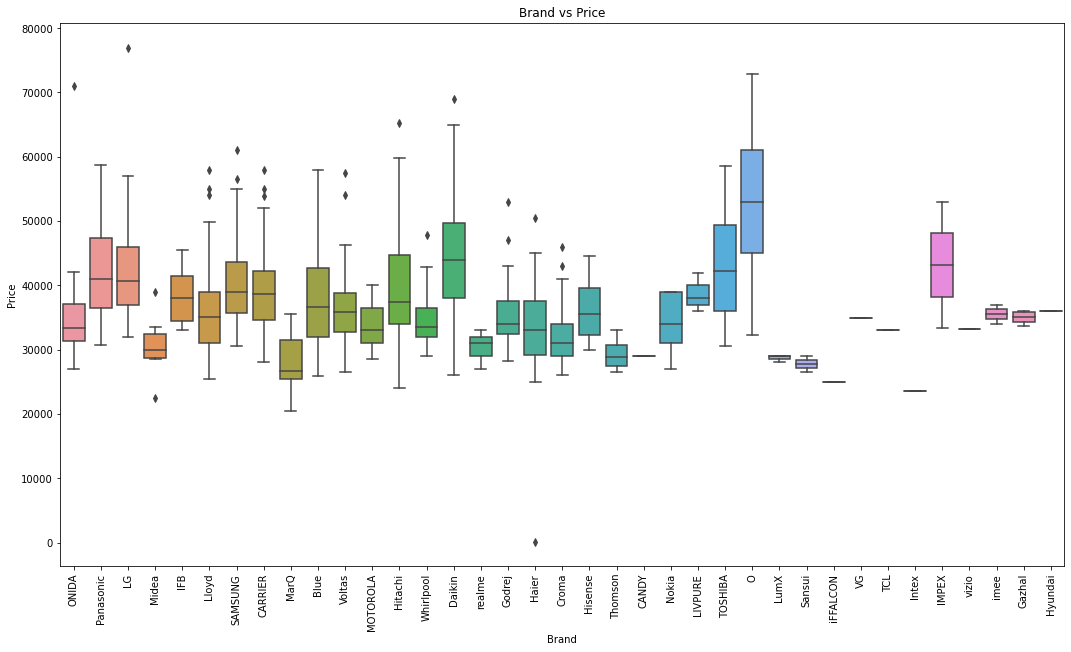

In [104]:
plt.figure(figsize=(18,10)) 
sns.boxplot(x="Brand", y="Price", data=project_data)
plt.title("Brand vs Price")
plt.xticks(rotation=90)
plt.show()

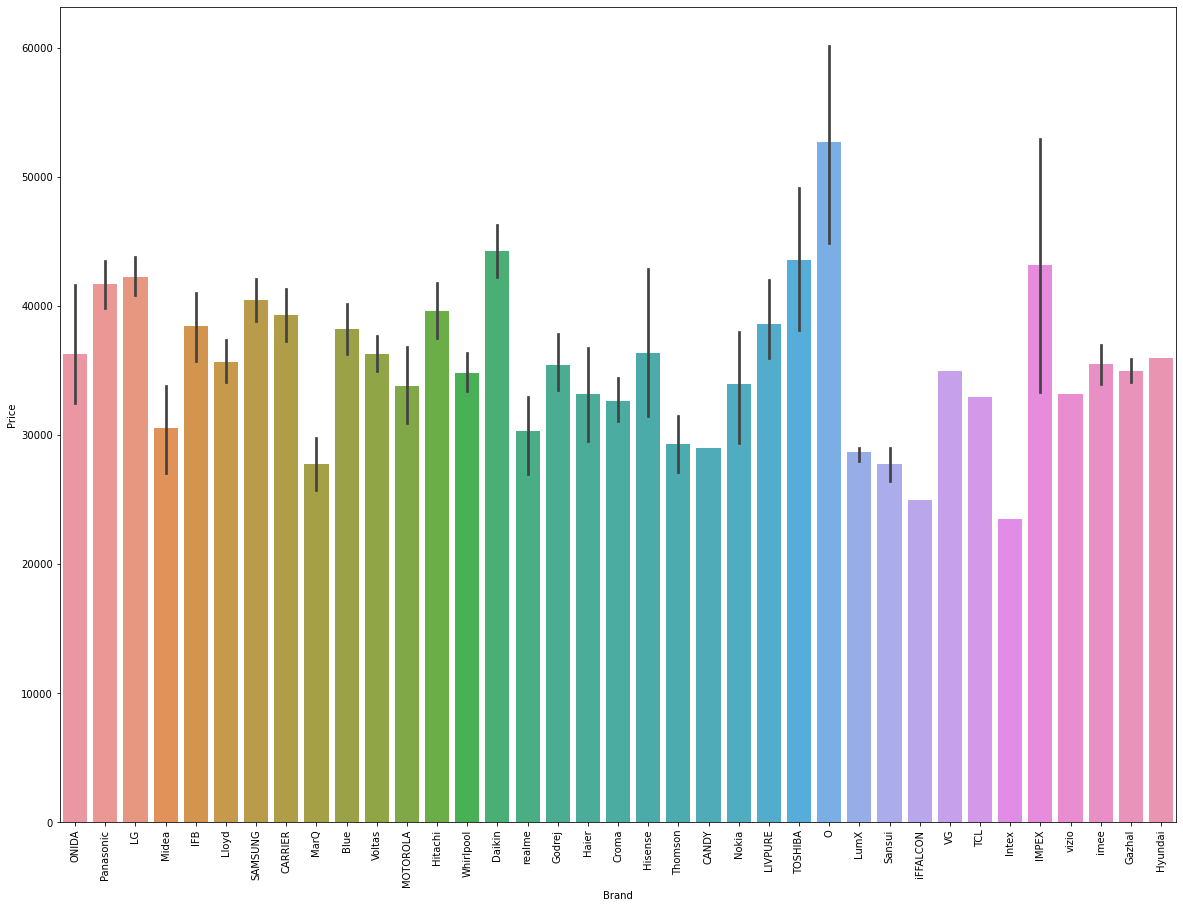

In [107]:
plt.figure(figsize=(20,15))
sns.barplot(x='Brand', y='Price', data=project_data)
plt.xticks(rotation = 90)
plt.show()

## Observation

We can conclude the insights of all our Brands and its respective prices.

In [108]:
crosstab = pd.crosstab(project_data['Brand'],project_data['Wi-Fi'])
crosstab

Wi-Fi,No,Yes
Brand,,
Blue,64,0
CANDY,1,0
CARRIER,45,2
Croma,32,0
Daikin,75,2
Gazhal,4,0
Godrej,24,1
Haier,24,1
Hisense,4,0


## Observation

From this crosstable, We can analyze the number of models with Wi-Fi feature in a paricular Brand.

<Figure size 1080x576 with 0 Axes>

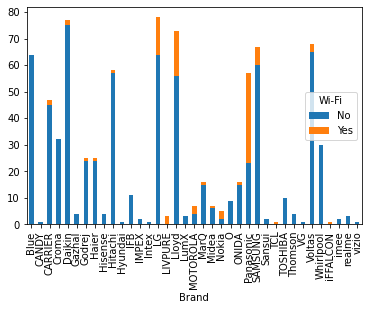

In [112]:
plt.figure(figsize=(15,8))
crosstab.plot(kind="bar", stacked=True)
plt.show()

## Observation of Brand vs Wi-Fi availability

This is the Bar chart visualization of Wi-Fi feature availabilty of all the Brands. We can conclude that there are many models with Wi-Fi feature in Panasonic followed by Lloyd & LG. Whereas, IFB, Toshiba and Blue Star didn't have any model with Wi-Fi feature.

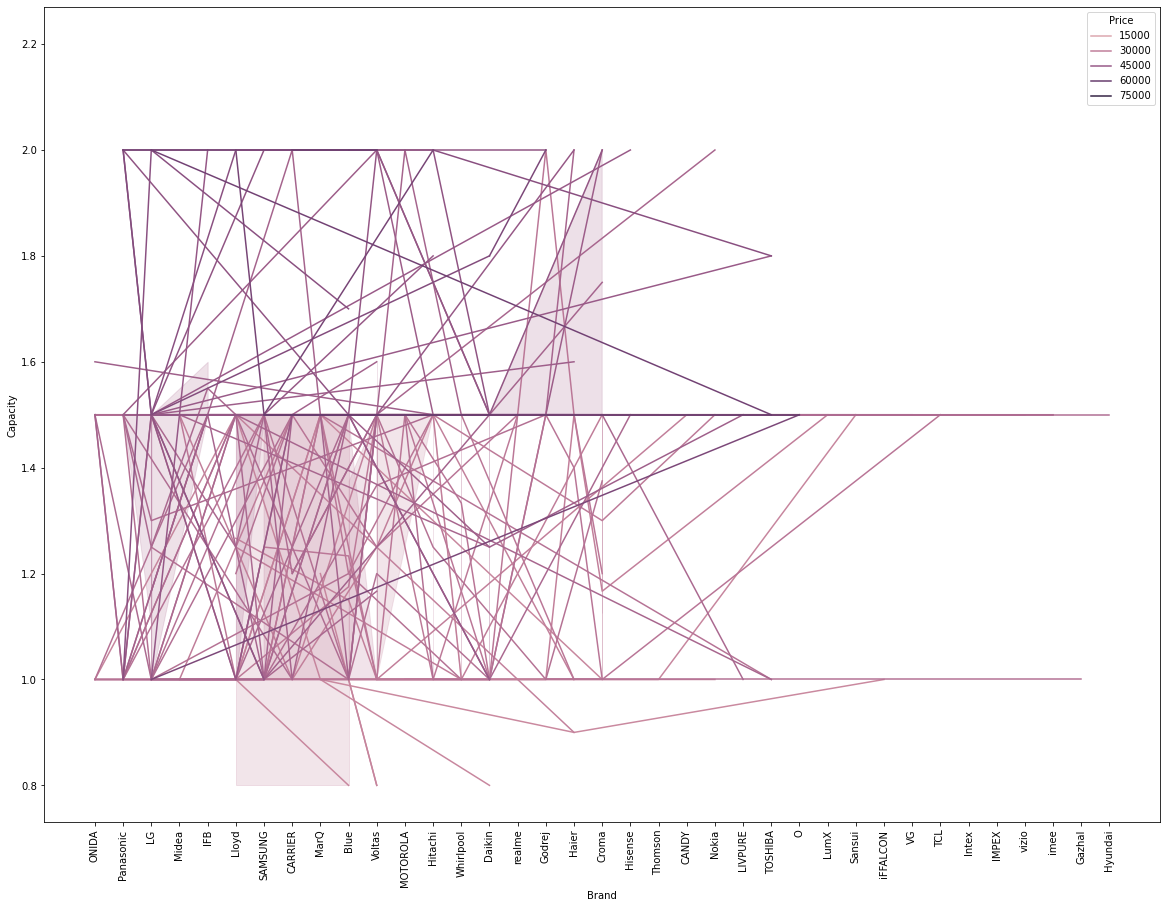

In [117]:
plt.figure(figsize=(20,15))
sns.lineplot(x = "Brand", y = "Capacity", hue='Price', data = project_data)
plt.xticks(rotation=90)
plt.show()

## Recommendation based on Price range

In [118]:
project_data[(project_data["Price"]>25000)&(project_data["Price"]<35000)]

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Wi-Fi,Warranty,Price
0,ONIDA,1.0,5,Copper,820.00,38,No,8,31490
1,Panasonic,1.0,3,Copper,1095.00,45,Yes,9,32999
3,Midea,1.5,3,Copper,1445.00,38,No,10,31499
4,IFB,1.5,3,Copper,1088.00,39,No,10,32999
5,Lloyd,1.5,3,Copper,1002.76,35,No,10,32999
...,...,...,...,...,...,...,...,...,...
805,SAMSUNG,1.0,4,Copper,960.00,31,No,10,31289
807,Hitachi,1.0,3,Copper,688.96,36,No,10,32721
809,Daikin,1.0,3,Copper,1110.00,51,No,8,30790
814,Croma,1.5,3,Copper,1590.00,54,No,5,28390


## Recommendation based on Brand

In [119]:
project_data[(project_data['Brand'] == "Lloyd")]

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Wi-Fi,Warranty,Price
5,Lloyd,1.5,3,Copper,1002.76,35,No,10,32999
22,Lloyd,1.5,5,Copper,864.66,35,No,10,37999
23,Lloyd,1.5,3,Copper,1087.62,42,No,5,32999
32,Lloyd,1.2,3,Copper,918.14,32,No,10,30499
33,Lloyd,1.5,3,Copper,1269.53,53,No,5,27950
...,...,...,...,...,...,...,...,...,...
760,Lloyd,1.5,5,Copper,1440.00,52,No,5,31575
783,Lloyd,1.0,5,Copper,678.46,32,Yes,10,37490
794,Lloyd,1.0,3,Copper,707.41,32,No,10,34990
806,Lloyd,1.5,3,Copper,1700.00,38,No,8,35990


## Recommendation based on feature

In [120]:
project_data[(project_data['Wi-Fi'] == "Yes")]

,Brand,Capacity,Rating,Condenser Coil,Power Consumption,Noise Level,Wi-Fi,Warranty,Price
1,Panasonic,1.0,3,Copper,1095.00,45,Yes,9,32999
28,CARRIER,1.5,5,Copper,1390.00,38,Yes,10,44990
36,Panasonic,1.5,3,Copper,1770.00,48,Yes,9,36990
48,LG,1.5,5,Copper,5000.00,44,Yes,8,37999
54,Panasonic,1.5,5,Copper,840.75,46,Yes,10,42990
...,...,...,...,...,...,...,...,...,...
776,Panasonic,1.5,4,Copper,1660.00,38,Yes,10,44776
783,Lloyd,1.0,5,Copper,678.46,32,Yes,10,37490
797,Panasonic,2.0,5,Copper,1013.01,47,Yes,8,52904
804,Panasonic,1.5,5,Copper,1440.00,47,Yes,9,49100
